In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
#import csvs

mxene = pd.read_csv('Data/Mxene.csv')
kwo_1 = pd.read_csv('Data/KWO Test-1.csv')
kwo_2 = pd.read_csv('Data/KWO Test- 2.csv')

In [79]:
#data processing

#label columns 
#Resistance, Current, Voltage, Time

mxene.columns = ['Resistance', 'Current', 'Voltage', 'Time']
kwo_1.columns = ['Resistance', 'Current', 'Voltage', 'Time']
kwo_2.columns = ['Resistance', 'Current', 'Voltage', 'Time']


In [80]:
#mxene initial time




#mxene time correction

mxene['hours'], mxene['minutes'], mxene['seconds'] = mxene['Time'].str.split(':', 2).str
mxene['hours'] = pd.to_numeric(mxene['hours'])
mxene['minutes'] = pd.to_numeric(mxene['minutes'])
mxene['seconds'] = pd.to_numeric(mxene['seconds'])
mxene['Time'] = mxene['hours']*3600 + mxene['minutes']*60 + mxene['seconds']

mxene_init = mxene['Time'][0]
mxene['Time'] = mxene['Time'] - mxene_init

print(mxene['Time'])




0         0
1         1
2         3
3         4
4         5
       ... 
714    1045
715    1047
716    1049
717    1051
718    1053
Name: Time, Length: 719, dtype: int64


/var/folders/0p/gqwrfts538g0nczcykltdf980000gn/T/ipykernel_2833/3298575357.py:8: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  mxene['hours'], mxene['minutes'], mxene['seconds'] = mxene['Time'].str.split(':', 2).str


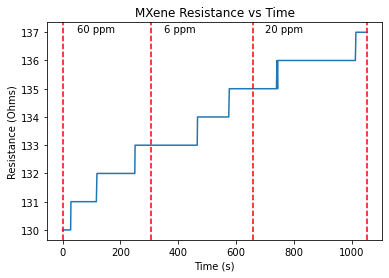

In [81]:
plt.plot(mxene['Time'], mxene['Resistance'])
plt.xlabel('Time (s)')
plt.ylabel('Resistance (Ohms)')
plt.title('MXene Resistance vs Time')

# Adding in the exposed acetone level with a legend and horizontal lines to represent time duration of exposure
plt.axvline(x=0, color='r', linestyle='--', label='Acetone Exposure')
plt.axvline(x=305, color='r', linestyle='--')
plt.axvline(x=658, color='r', linestyle='--')
plt.axvline(x=1053, color='r', linestyle='--')

#put in text for the exposure amount ppm

plt.text(50, 137, '60 ppm')
plt.text(350, 137, '6 ppm')
plt.text(700, 137, '20 ppm')



plt.show()

In [82]:
ratios = {}

ratios['labels'] = ['Mxene', 'KWO-1', 'KWO-2']
ratios['resistance delta'] = [.0098, .00567, .00506]
ratios['ppm'] = [60, 6, 20]
ratios['ratio'] = [delta/ppm for delta, ppm in zip(ratios['resistance delta'], ratios['ppm'])]

#print ratios as a table

print(pd.DataFrame(ratios))



  labels  resistance delta  ppm     ratio
0  Mxene           0.00980   60  0.000163
1  KWO-1           0.00567    6  0.000945
2  KWO-2           0.00506   20  0.000253


In [83]:
#constant assumption

#assuming horizontal line in every acetone region

#adding up all mxene values from 0-305, 305-658, 658-1053

mxene_1 = mxene[mxene['Time'] <= 305]
mxene_2 = mxene[(mxene['Time'] > 305) & (mxene['Time'] <= 658)]
mxene_3 = mxene[(mxene['Time'] > 658) & (mxene['Time'] <= 1053)]

mxene_1_mean = mxene_1['Resistance'].mean()
mxene_2_mean = mxene_2['Resistance'].mean()
mxene_3_mean = mxene_3['Resistance'].mean()

print(mxene_1_mean)
print(mxene_2_mean)
print(mxene_3_mean)


#ohms / ppm


mxene_1_ratio = mxene_1_mean / 60
mxene_2_ratio = mxene_2_mean / 6
mxene_3_ratio = mxene_3_mean / 20

print(' ')

print(mxene_1_ratio)
print(mxene_2_ratio)
print(mxene_3_ratio)



131.68273092369478
133.736
135.8590909090909
 
2.1947121820615796
22.28933333333333
6.792954545454545


In [84]:
#kwo-1

kwo_1['hours'], kwo_1['minutes'], kwo_1['seconds'] = kwo_1['Time'].str.split(':', 2).str
kwo_1['hours'] = pd.to_numeric(kwo_1['hours'])
kwo_1['minutes'] = pd.to_numeric(kwo_1['minutes'])
kwo_1['seconds'] = pd.to_numeric(kwo_1['seconds'])
kwo_1['Time'] = kwo_1['hours']*3600 + kwo_1['minutes']*60 + kwo_1['seconds']

kwo_1_init = kwo_1['Time'][0]
kwo_1['Time'] = kwo_1['Time'] - kwo_1_init






/var/folders/0p/gqwrfts538g0nczcykltdf980000gn/T/ipykernel_2833/748937719.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  kwo_1['hours'], kwo_1['minutes'], kwo_1['seconds'] = kwo_1['Time'].str.split(':', 2).str


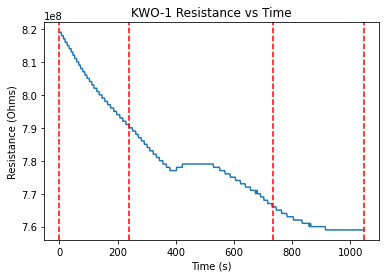

In [92]:
plt.plot(kwo_1['Time'], kwo_1['Resistance'])
plt.xlabel('Time (s)')
plt.ylabel('Resistance (Ohms)')
plt.title('KWO-1 Resistance vs Time')

# Adding in the exposed acetone level with a legend and horizontal lines to represent time duration of exposure

plt.axvline(x=0, color='r', linestyle='--')
plt.axvline(x=240, color='r', linestyle='--')
plt.axvline(x=734, color='r', linestyle='--')
plt.axvline(x=1046, color='r', linestyle='--')

#put in text for the exposure amount ppm


plt.show()


In [93]:
#kwo-2

kwo_2['hours'], kwo_2['minutes'], kwo_2['seconds'] = kwo_2['Time'].str.split(':', 2).str
kwo_2['hours'] = pd.to_numeric(kwo_2['hours'])
kwo_2['minutes'] = pd.to_numeric(kwo_2['minutes'])
kwo_2['seconds'] = pd.to_numeric(kwo_2['seconds'])

kwo_2['Time'] = kwo_2['hours']*3600 + kwo_2['minutes']*60 + kwo_2['seconds']

kwo_2_init = kwo_2['Time'][0]
kwo_2['Time'] = kwo_2['Time'] - kwo_2_init



/var/folders/0p/gqwrfts538g0nczcykltdf980000gn/T/ipykernel_2833/1043910544.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  kwo_2['hours'], kwo_2['minutes'], kwo_2['seconds'] = kwo_2['Time'].str.split(':', 2).str


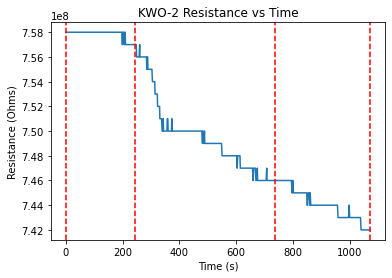

In [94]:
#plotting kwo-2

plt.plot(kwo_2['Time'], kwo_2['Resistance'])

plt.xlabel('Time (s)')
plt.ylabel('Resistance (Ohms)')
plt.title('KWO-2 Resistance vs Time')

# Adding in the exposed acetone level with a legend and horizontal lines to represent time duration of exposure

plt.axvline(x=0, color='r', linestyle='--')
plt.axvline(x=243, color='r', linestyle='--')
plt.axvline(x=735, color='r', linestyle='--')
plt.axvline(x=1071, color='r', linestyle='--')


plt.show()
